In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic_data = pd.read_csv("C:/Users/rayya/Downloads/archive (3)/tested.csv")

In [3]:
titanic_data
#looking and understanding the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


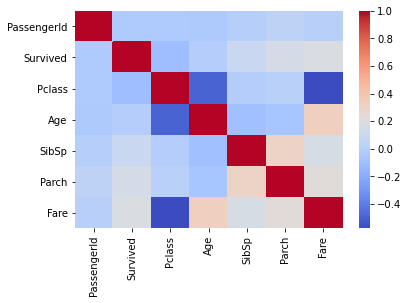

In [5]:
sns.heatmap(titanic_data.corr(), cmap = "coolwarm")
plt.show()

In [6]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
#from here we can see that Age, Fare and Cabin have some missing values

<AxesSubplot:xlabel='Survived', ylabel='count'>

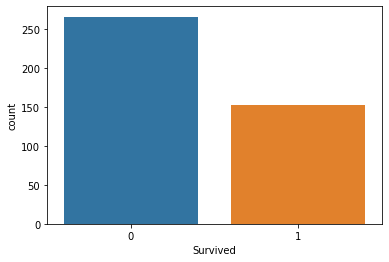

In [8]:
#here we plot some graphs to better understand the distribution of the data

sns.countplot(titanic_data['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

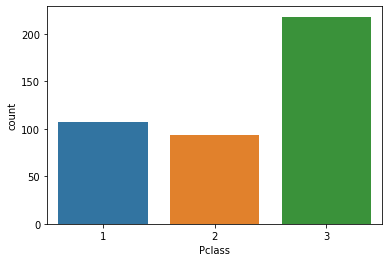

In [9]:
sns.countplot(data = titanic_data, x= 'Pclass')

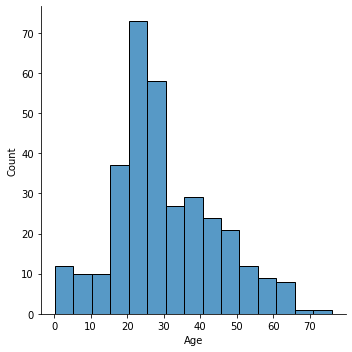

In [10]:
sns.displot(titanic_data['Age'])

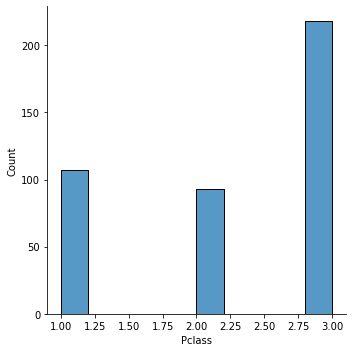

In [11]:
sns.displot(titanic_data['Pclass'])

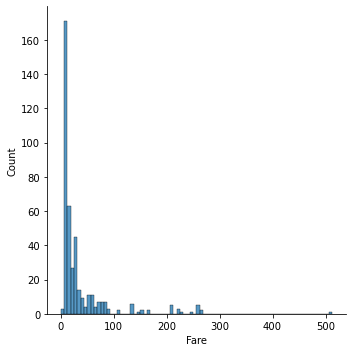

In [12]:
sns.displot(titanic_data['Fare'])

In [13]:
titanic_data.shape
#to see the shape of the data

(418, 12)

In [14]:
titanic_data.isnull().sum()
#to see the number of missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
#here we can see that almost the whole 'cabin' column is null so we will remove that column

In [16]:
titanic_data = titanic_data.drop(columns=['Cabin'], axis=1)

In [17]:
titanic_data.shape
#from the new shape we can see that one column has been dropped

(418, 11)

In [18]:
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].mean())
#replacing the missing values of the Age coulmn with the mean of the age column

In [19]:
titanic_data['Fare'] = titanic_data['Fare'].fillna(titanic_data['Fare'].mean())
#replacing the missing values of the Fare coulmn with the mean of the Fare column

In [20]:
titanic_data = titanic_data.drop(columns = ['Name'], axis =1)
#since the Name of passengers is unnesscary in our prediction, we will drop this column

In [21]:
titanic_data = titanic_data.drop(columns= ['Ticket'], axis = 1)
#since the Ticket number is also unnesseccary in our prediction, we will drop this column too

In [22]:
titanic_data.isnull().sum()
#now we can see that our data has 0 missing values

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
#we have to switch the categorical values to numerical values so we use labelencoder
cols = ['Sex']
le= LabelEncoder()
for col in cols:
    titanic_data[col] = le.fit_transform(titanic_data[col])

In [25]:
cols = ['Embarked']
le= LabelEncoder()
for col in cols:
    titanic_data[col] = le.fit_transform(titanic_data[col])

In [26]:
titanic_data.head()
#here we can see that now both Sex and Embareked have numerical values

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,1,34.5,0,0,7.8292,1
1,893,1,3,0,47.0,1,0,7.0000,2
2,894,0,2,1,62.0,0,0,9.6875,1
3,895,0,3,1,27.0,0,0,8.6625,2
4,896,1,3,0,22.0,1,1,12.2875,2


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

In [28]:
X = titanic_data.drop(columns=['PassengerId','Survived'], axis = 1)
y = titanic_data['Survived']

#defining x and y

In [29]:
def classify(model, x, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=35)
    model.fit(X_train, y_train)
    print('accuracy', model.score(X_test, y_test))
    
#splitting the data into test and training

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.decomposition import PCA

In [31]:
model = LogisticRegression( max_iter = 1000)
scores = cross_val_score(model, X, y, cv=10)
print('CV accuracy:', (np.mean(scores)))

#using cross validation in Logistic Regression

CV accuracy: 1.0


In [32]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)

#constructing a pipeline with standard scalar

pipe = make_pipeline(StandardScaler(),PCA(n_components = 4), Perceptron(eta0 = 0.001))
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))

0.9927536231884058


In [33]:
#pipe.get_params()
mod = GridSearchCV(estimator=pipe, param_grid={'pca__n_components': [1,2,3,4,5,6,7,8,9,10],
                                               'perceptron__eta0': [0.1,0.001,0.01,],
                                               'perceptron__max_iter': [1000], 
                                               'perceptron__verbose':[0]},
                   cv=3)
mod.fit(X, y)
pd.DataFrame(mod.cv_results_)

# used GridsearchCV to tune hyper Parameters and cross validation

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,param_perceptron__eta0,param_perceptron__max_iter,param_perceptron__verbose,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012247,0.005882,0.003367,2.502626e-03,1,0.1,1000,0,"{'pca__n_components': 1, 'perceptron__eta0': 0...",0.607143,0.647482,0.625899,0.626841,0.016482,19
1,0.009394,0.001985,0.003663,9.417293e-04,1,0.001,1000,0,"{'pca__n_components': 1, 'perceptron__eta0': 0...",0.607143,0.647482,0.625899,0.626841,0.016482,19
2,0.009068,0.002326,0.003330,1.246428e-03,1,0.01,1000,0,"{'pca__n_components': 1, 'perceptron__eta0': 0...",0.607143,0.647482,0.625899,0.626841,0.016482,19
3,0.007088,0.000133,0.002998,4.052337e-07,2,0.1,1000,0,"{'pca__n_components': 2, 'perceptron__eta0': 0...",0.742857,0.733813,0.805755,0.760808,0.031996,16
4,0.007761,0.000879,0.003908,6.444118e-04,2,0.001,1000,0,"{'pca__n_components': 2, 'perceptron__eta0': 0...",0.742857,0.719424,0.812950,0.758410,0.039734,18
5,0.008425,0.002575,0.004070,8.227578e-04,2,0.01,1000,0,"{'pca__n_components': 2, 'perceptron__eta0': 0...",0.742857,0.733813,0.805755,0.760808,0.031996,16
6,0.007105,0.000157,0.003110,1.602150e-04,3,0.1,1000,0,"{'pca__n_components': 3, 'perceptron__eta0': 0...",0.950000,0.848921,0.992806,0.930576,0.060325,13
7,0.006732,0.000529,0.003095,1.389722e-04,3,0.001,1000,0,"{'pca__n_components': 3, 'perceptron__eta0': 0...",0.942857,0.798561,0.985612,0.909010,0.080026,15
8,0.007768,0.001095,0.002664,4.708084e-04,3,0.01,1000,0,"{'pca__n_components': 3, 'perceptron__eta0': 0...",0.950000,0.848921,0.985612,0.928177,0.057898,14
9,0.007557,0.001104,0.002664,4.705275e-04,4,0.1,1000,0,"{'pca__n_components': 4, 'perceptron__eta0': 0...",1.000000,1.000000,0.992806,0.997602,0.003391,8


In [34]:
pipe = make_pipeline(StandardScaler(), PCA(n_components = 4), LogisticRegression(solver= 'lbfgs', max_iter=1000))
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))

#finding accuracy using hypertuned values from GridSearch

0.9927536231884058


In [35]:
pipe = make_pipeline(StandardScaler(),PCA(n_components = 3), SVC(kernel='linear'))
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))
#pipe.get_params()

#making pipeline for SVC using the hypertuned results from GridSearch

0.9927536231884058


In [36]:
mod = GridSearchCV(estimator=pipe,
               param_grid={'svc__kernel': ['linear','poly','rbf','sigmoid']}
               ,cv=10)
mod.fit(X, y);
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011478,0.002450,0.003797,0.000979,linear,{'svc__kernel': 'linear'},1.000000,0.928571,0.952381,0.952381,0.904762,0.952381,1.000000,0.976190,0.951220,0.975610,0.959350,0.028270,1
1,0.011789,0.001885,0.004596,0.001019,poly,{'svc__kernel': 'poly'},0.904762,0.857143,0.928571,0.928571,0.857143,0.928571,0.833333,0.928571,0.853659,0.926829,0.894715,0.037409,4
2,0.009491,0.001626,0.003997,0.000999,rbf,{'svc__kernel': 'rbf'},0.976190,0.952381,0.952381,0.952381,0.928571,0.928571,0.976190,1.000000,0.902439,0.975610,0.954472,0.027432,2
3,0.010091,0.002734,0.003597,0.001019,sigmoid,{'svc__kernel': 'sigmoid'},1.000000,0.880952,0.976190,0.880952,0.857143,0.928571,0.976190,0.976190,0.926829,0.878049,0.928107,0.049087,3
